In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa

In [2]:
data_path = Path.cwd().parent / "data"
data_path

PosixPath('/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/data')

In [3]:
ls = pd.read_parquet(data_path / "processed" / "listings_cleaned.parquet")

In [4]:
pd.set_option('display.float_format', '{:,.2f}'.format)
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           4932 non-null   int64         
 1   name                         4932 non-null   object        
 2   host_id                      4932 non-null   int64         
 3   host_since                   4682 non-null   datetime64[ns]
 4   host_location                3267 non-null   object        
 5   host_acceptance_rate         4378 non-null   float64       
 6   host_is_superhost            4560 non-null   object        
 7   host_total_listings_count    4682 non-null   Int16         
 8   host_identity_verified       4682 non-null   object        
 9   neighbourhood                1821 non-null   category      
 10  neighbourhood_cleansed       4932 non-null   category      
 11  latitude                     4932 non-null 

In [26]:
ls.head(2).T

,0,1
id,218831,376955
last_scraped,2025-06-24 00:00:00,2025-06-24 00:00:00
name,Sea-life apartment,3 bedroom 145m2 apartment close to the seaside
host_id,137588,1894819
host_since,2010-06-03 00:00:00,2012-03-10 00:00:00
host_location,"Thessalonika, Greece","Thessalonika, Greece"
host_acceptance_rate,0.0,NaN
host_is_superhost,False,False
host_total_listings_count,2,2
host_identity_verified,False,True


### percentage of licenced listings

In [ ]:
na_mask = ls["license"].isna()
dupli_mask = ls["license"].duplicated(keep=False) & ls["license"].notna() & (ls["license"] != "Exempt")
exempt_mask = ls["license"] == "Exempt"

na_df = ls[na_mask]
dupli_df = ls[dupli_mask]
exempt_df = ls[exempt_mask]

#na_df.to_parquet("../data/processed/listings_na_license.parquet", engine="pyarrow", index=False)
#dupli_df.to_parquet("../data/processed/listings_dupli_license.parquet", engine="pyarrow", index=False)
#exempt_df.to_parquet("../data/processed/listings_exempt_license.parquet", engine="pyarrow", index=False)



In [83]:
ls["id"].nunique()

4932

In [7]:
na_df.head()

,id,name,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
1,376955,3 bedroom 145m2 apartment close to the seaside,1894819,2012-03-10,"Thessalonika, Greece",NaN,False,2,True,NaN,...,4.94,4.79,4.89,5.00,4.78,4.68,4.61,None,False,0.12
22,3276780,"Apartment in Ano Poli, Thessaloniki",16565876,2014-06-09,"Berlin, Germany",0.00,False,2,True,"Thessaloniki, Makedonia Thraki, Greece",...,4.33,4.55,4.12,4.73,4.79,4.73,4.48,None,False,0.86
26,4126656,Cosy room + wi-fi in central flat,21406334,2014-09-16,"Thessaloniki, Greece",NaN,False,1,True,"Thessaloniki, Greece",...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,None,False,0.01
35,5605342,Central Modern 500m White Tower,10383013,2013-12-02,None,0.22,False,3,True,"Θεσσαλονίκη, Greece",...,4.24,4.35,4.35,4.63,4.65,4.60,4.50,None,False,0.14
111,13113431,"The Little GReeNce, by Zormir! The one and only!",32221596,2015-04-29,"Kalamaria, Greece",NaN,False,1,True,"Thessaloniki, Greece",...,4.55,4.68,4.70,4.92,4.92,4.95,4.59,None,False,0.35


In [8]:
dupli_df.head()

,id,name,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
4,550239,Kripis Studio Thessaloniki No1,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Central Macedonia, Greece",...,4.30,4.20,4.50,4.80,5.00,4.50,4.10,1133335,True,0.06
8,1006153,Kripis Studio Thessaloniki No4,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Makedonia Thraki, Greece",...,4.83,4.78,4.83,5.00,4.89,4.78,4.83,1133335,True,0.18
10,1013340,Kripis Studio Thessaloniki No2,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Makedonia Thraki, Greece",...,4.50,4.50,4.50,5.00,4.50,4.17,4.50,1133335,True,0.07
13,1117177,Kripis Studio Thessaloniki No3,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Makedonia Thraki, Greece",...,4.67,4.56,4.44,4.44,4.33,4.75,4.25,1133335,True,0.10
110,12926477,white tower city center loft,70494327,2016-05-05,"Thessaloniki, Greece",1.00,True,2,True,"Θεσσαλονίκη, Makedonia Thraki, Greece",...,4.71,4.76,4.65,4.86,4.93,4.94,4.71,00001751175,True,4.35


In [11]:
non_regular_index = pd.concat([na_df, dupli_df, exempt_df]).index
ls_regular = ls.drop(index=non_regular_index)
ls_regular.shape

(4451, 42)

In [ ]:
#ls_regular.to_parquet(data_path / "processed" / "listings_regular_license.parquet", engine="pyarrow", index=False)

<hr>

### Check exempt

In [18]:
exempt_df.head(3).T

,14,883,1462
id,1397321,38672330,546031332520686103
name,Kripis Studio Thessaloniki No5,Waterfront Apartment_OT1,Unique Waterfront Apartment with Sea View_TRM1102
host_id,1193625,6836073,433471717
host_since,NaT,2013-06-10 00:00:00,2021-11-25 00:00:00
host_location,None,"Novi Sad, Serbia","Belgrade, Serbia"
host_acceptance_rate,NaN,0.51,0.34
host_is_superhost,True,False,False
host_total_listings_count,<NA>,41,56
host_identity_verified,None,True,True
neighbourhood,"Thessaloniki, Makedonia Thraki, Greece","Thessaloniki, Greece",NaN


In [40]:
cols_todrop = ["id", "host_id", "host_since", "longitude", "latitude"]
exempt_df.drop(columns=cols_todrop).describe().T

NameError: name 'exempt_df' is not defined

In [20]:
# percentage of exempt listings
exempt_df.shape[0] / ls.shape[0] * 100

0.851581508515815

In [21]:
exempt_df["number_of_reviews"].sort_values(ascending=False).head(5)

1967    38
3479    26
2399    21
3017    11
3594    10
Name: number_of_reviews, dtype: int64

In [25]:
exempt_df.loc[[1967, 3479, 2399, 3017, 3594], :].T

,1967,3479,2399,3017,3594
id,783090274620300671,1191193772456362986,931959667193659089,1097954503331571600,1216097156342792505
name,Κοντά στην παραλια της Καλαμαριας,San Marco di Petro Thessaloniki,Stylish Apartment in City Center,Premium Loft In City Center,Sunshine room studio
host_id,155399708,405376667,470648435,470648435,123750052
host_since,2017-10-20 00:00:00,2021-06-05 00:00:00,2022-07-20 00:00:00,2022-07-20 00:00:00,2017-04-01 00:00:00
host_location,"Thessaloniki, Greece",None,"London, United Kingdom","London, United Kingdom","Thessaloniki, Greece"
host_acceptance_rate,0.82,0.97,1.00,1.00,1.00
host_is_superhost,True,True,False,False,False
host_total_listings_count,4,1,10,10,5
host_identity_verified,True,True,True,True,True
neighbourhood,"Kalamaria Municipality, Greece","Thessaloniki, Greece",NaN,NaN,NaN


In [22]:
exempt_df["property_type"].value_counts()

property_type
Entire rental unit                    20
Entire condo                          11
Private room in guest suite            4
Private room in condo                  2
Private room in rental unit            2
Entire serviced apartment              1
Entire home                            1
Camper/RV                              1
Entire guest suite                     0
Earthen home                           0
Dome                                   0
Entire guesthouse                      0
Entire place                           0
Dammuso                                0
Boat                                   0
Barn                                   0
Entire vacation home                   0
Entire townhouse                       0
Entire loft                            0
Private room in bed and breakfast      0
Entire villa                           0
Private room in guesthouse             0
Private room in home                   0
Private room in serviced apartment     0
Pr

In [23]:
exempt_df["host_id"].value_counts()

host_id
433471717    12
470648435     5
40847564      3
193648624     2
123750052     2
6836073       1
1193625       1
250646680     1
155399708     1
227230581     1
556603563     1
347464647     1
490635683     1
481210903     1
405376667     1
466453048     1
369235800     1
53043260      1
159760098     1
228225394     1
1462276       1
587261856     1
599332270     1
Name: count, dtype: int64

In [7]:
12/exempt_df.shape[0] * 100

28.57142857142857

In [17]:
exempt_df["availability_365"].min()

54

In [8]:
exempt_df.iloc[exempt_df["availability_365"].argmin()]

id                                            783090274620300671
name                           Κοντά στην παραλια της Καλαμαριας
host_id                                                155399708
host_since                                   2017-10-20 00:00:00
host_location                               Thessaloniki, Greece
host_acceptance_rate                                        0.82
host_is_superhost                                           True
host_total_listings_count                                      4
host_identity_verified                                      True
neighbourhood                     Kalamaria Municipality, Greece
neighbourhood_cleansed                                 Kalamaria
latitude                                               40.574583
longitude                                              22.959954
property_type                        Private room in rental unit
room_type                                           Private room
accommodates             

Geographically -  most buildings next to ataturk museum and german colnsulate (προξενειο)  
Property types - A couple of listings might be eligible for exemption, but the majority are regular rental units.  
Year-round availability - Regular, no very short short day availability
host analysis - 5 host with more than 1 exemptions, especially one has ~30% of all exemptions.Most of them are not greek
property names - not suggestive of hotels or motels
a particular host has almost identical listigs only with small number  differences in the listing name



In [10]:
exempt_df["name"].loc[exempt_df['host_id']==433471717]

1462    Unique Waterfront Apartment with Sea View_TRM1102
1468    Unique Waterfront Apartment with Sea View_TRM1111
1471    Unique Waterfront Apartment with Sea View_TRM6711
1485                       Old Town Family Apartment_M112
1486                       Old Town Family Apartment_M678
1489                       Old Town Family Apartment_M8L8
1512                          Seafront Mini Studio_Moffer
1514                             Seafront Mini Studio_MT6
1515                             Seafront Mini Studio_MT7
1516                             Seafront Mini Studio_MT8
4660                       Old Town Family Apartment_M118
4661                       Old Town Family Apartment_M458
Name: name, dtype: object

In [11]:
ls["property_type"].unique()

array(['Entire rental unit', 'Entire condo', 'Entire serviced apartment',
       'Private room in condo', 'Entire loft',
       'Private room in rental unit', 'Entire home', 'Tiny home',
       'Entire place', 'Entire townhouse', 'Entire villa', 'Dome',
       'Camper/RV', 'Room in boutique hotel',
       'Private room in bed and breakfast', 'Private room in home',
       'Entire guest suite', 'Entire guesthouse', 'Room in aparthotel',
       'Boat', 'Private room in guest suite', 'Entire vacation home',
       'Shared room in condo', 'Room in hotel', 'Earthen home',
       'Private room in guesthouse', 'Private room in villa',
       'Private room in serviced apartment', 'Tent',
       'Shared room in hostel', 'Barn', 'Dammuso'], dtype=object)

<hr>

### NA licenses

In [3]:
na_df = pd.read_parquet(data_path / "processed" / "listings_na_license.parquet")

In [4]:
na_df.shape

(31, 42)

In [27]:
na_df.drop(columns=cols_todrop).describe().T

,count,mean,std,min,25%,50%,75%,max
host_acceptance_rate,12.00,0.38,0.42,0.00,0.00,0.26,0.62,1.00
host_total_listings_count,30.00,1.67,1.24,1.00,1.00,1.00,2.00,6.00
accommodates,31.00,3.84,1.92,1.00,2.00,4.00,5.00,9.00
bathrooms,27.00,1.22,0.42,1.00,1.00,1.00,1.25,2.50
bedrooms,31.00,1.81,0.79,1.00,1.00,2.00,2.00,3.00
beds,27.00,2.48,1.34,1.00,1.00,3.00,3.00,5.00
price,27.00,107.63,106.94,15.00,43.50,72.00,122.00,457.00
minimum_nights,31.00,24.71,67.35,1.00,1.50,3.00,10.00,365.00
maximum_nights,31.00,691.58,465.83,14.00,317.50,"1,125.00","1,125.00","1,125.00"
availability_30,31.00,17.52,12.86,0.00,3.00,23.00,29.00,30.00


In [35]:
na_df.host_acceptance_rate

0      NaN
1     0.00
2      NaN
3     0.22
4      NaN
5     0.00
6     0.00
7     0.00
8      NaN
9      NaN
10     NaN
11    0.50
12    1.00
13    1.00
14     NaN
15    0.50
16    1.00
17    0.05
18     NaN
19     NaN
20     NaN
21    0.29
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
Name: host_acceptance_rate, dtype: float64

In [31]:
# percentage of exempt listings
na_df.shape[0] / ls.shape[0] * 100

0.6285482562854825

In [34]:
na_df["number_of_reviews"].sort_values(ascending=False).head(10)

22     113
793     71
291     58
425     44
111     38
309     38
1       19
354     18
35      17
483     16
Name: number_of_reviews, dtype: int64

In [37]:
na_df["host_id"].value_counts().head()

host_id
153803203    2
1894819      1
21406334     1
10383013     1
32221596     1
Name: count, dtype: int64

In [39]:
na_df["property_type"].value_counts().head()

property_type
Entire rental unit             22
Entire condo                    3
Entire home                     3
Private room in condo           2
Private room in rental unit     1
Name: count, dtype: int64

- small acceptance rates  
- few total listings
- higher than average mean price
- very high max value for estimated revenue
- listings with high number of reviews show well established listings
- dates do not show recently created listings

In [ ]:
# max estimated revenue
na_df.loc[na_df["estimated_revenue_l365d"].idxmax()].T

id                                                     36552039
name                           Imperium I - White Tower #Skgbnb
host_id                                                28267881
host_since                                                  NaT
host_location                                              None
host_acceptance_rate                                        NaN
host_is_superhost                                          None
host_total_listings_count                                  <NA>
host_identity_verified                                     None
neighbourhood                              Thessaloniki, Greece
neighbourhood_cleansed                             Thessaloniki
latitude                                                  40.63
longitude                                                 22.95
property_type                                      Entire condo
room_type                                       Entire home/apt
accommodates                            

In [23]:
na_df.sort_values("estimated_revenue_l365d", ascending=False).head(5).T

,22,21,15,17,5
id,36552039,36061587,29792242,31069012,13277703
name,Imperium I - White Tower #Skgbnb,Ωραίο διαμέρισμα δίπλα στο μετρό,Cozy #SKG: Like a Local,ROOMS IN THE apartment in the center!CHEK IN 1...,villa loco lav
host_id,28267881,270502015,207973232,232098635,74839332
host_since,NaT,2019-06-22 00:00:00,2018-08-07 00:00:00,2018-12-23 00:00:00,2016-05-30 00:00:00
host_location,None,"Thessaloniki, Greece","Thessaloniki, Greece","Thessaloniki, Greece","Thessaloniki, Greece"
host_acceptance_rate,NaN,0.29,0.5,0.05,0.0
host_is_superhost,None,False,False,False,False
host_total_listings_count,<NA>,1,1,1,1
host_identity_verified,None,True,True,True,True
neighbourhood,"Thessaloniki, Greece",NaN,NaN,"Ampelokipi, Greece",NaN


<Axes: >

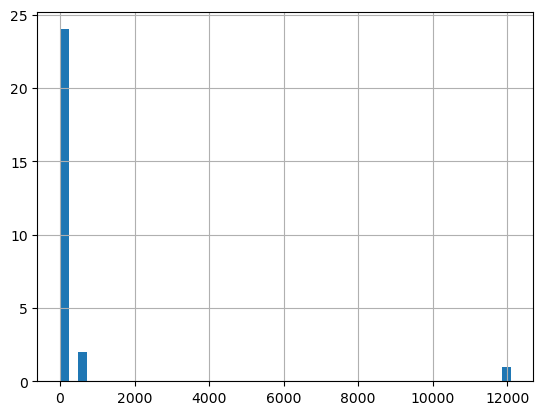

In [24]:
na_df["estimated_revenue_l365d"].hist(bins=50)

<Axes: >

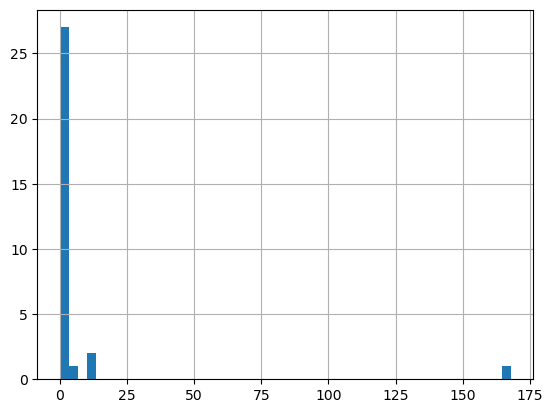

In [25]:
na_df.estimated_occupancy_l365d.hist(bins=50)


In [40]:
# max n reviews
na_df.loc[na_df["number_of_reviews"].idxmax()].T

id                                                            3276780
name                              Apartment in Ano Poli, Thessaloniki
host_id                                                      16565876
host_since                                        2014-06-09 00:00:00
host_location                                         Berlin, Germany
host_acceptance_rate                                             0.00
host_is_superhost                                               False
host_total_listings_count                                           2
host_identity_verified                                           True
neighbourhood                  Thessaloniki, Makedonia Thraki, Greece
neighbourhood_cleansed                                   Thessaloniki
latitude                                                        40.64
longitude                                                       22.95
property_type                                      Entire rental unit
room_type           

In [42]:
na_df["host_location"].value_counts().head(5)

host_location
Thessaloniki, Greece    17
Thessalonika, Greece     1
Berlin, Germany          1
Kalamaria, Greece        1
Moscow, Russia           1
Name: count, dtype: int64

In [9]:
na_df["host_since"].sort_values(ascending=False)

29   2024-01-21
30   2021-12-27
21   2019-06-22
17   2018-12-23
19   2018-08-19
18   2018-08-07
15   2018-08-07
14   2018-07-28
13   2018-05-24
12   2018-03-26
10   2017-11-17
9    2017-10-08
25   2017-10-08
16   2017-08-14
8    2017-06-19
7    2016-08-27
20   2016-06-21
26   2016-06-14
5    2016-05-30
27   2016-05-29
11   2016-03-07
28   2015-12-30
6    2015-09-04
4    2015-04-29
24   2015-03-14
2    2014-09-16
1    2014-06-09
3    2013-12-02
0    2012-03-10
23   2010-05-08
22          NaT
Name: host_since, dtype: datetime64[ns]

In [16]:
na_df["host_acceptance_rate"].mean(), ls["host_acceptance_rate"].mean()

(np.float64(0.38000000000000006), np.float64(0.9268341708542714))

<Axes: >

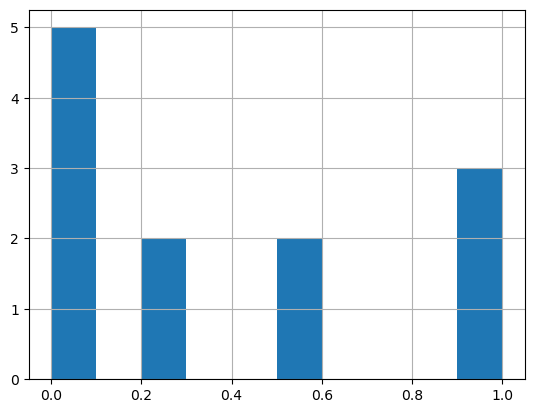

In [17]:
na_df["host_acceptance_rate"].hist()

In [20]:
na_df.loc[na_df["host_acceptance_rate"] < 0.5, ["host_acceptance_rate", "price", "estimated_revenue_l365d"]]

,host_acceptance_rate,price,estimated_revenue_l365d
1,0.00,20.0,0.0
3,0.22,NaN,NaN
5,0.00,100.0,0.0
6,0.00,92.0,0.0
7,0.00,63.0,0.0
17,0.05,15.0,90.0
21,0.29,51.0,612.0


In [26]:
# max price
na_df.loc[na_df["price"].idxmax()].T

id                                                                   41550599
name                           Panorama Thessaloniki Great View ALSO FOR RENT
host_id                                                              29328176
host_since                                                2015-03-14 00:00:00
host_location                                                Panorama, Greece
host_acceptance_rate                                                      NaN
host_is_superhost                                                       False
host_total_listings_count                                                   1
host_identity_verified                                                   True
neighbourhood                                                Panorama, Greece
neighbourhood_cleansed                                     Pilea – Chortiatis
latitude                                                               40.587
longitude                                                       

na listings look like listings filled with systematic errors, and they have nothing important to add to our analysis

<hr>

In [29]:
ls.loc[ls["host_id"]==28267881]

,id,name,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
267,20757624,Eclipse Suite #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.88,4.87,4.95,4.95,4.92,4.88,4.81,00003105568,True,0.82
363,23229196,Skyline-Aristotelous Square #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.78,4.86,4.86,4.97,4.97,4.99,4.68,00001131891,True,2.68
722,34187846,Nota - Karolou Dil,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.96,5.00,4.87,5.00,5.00,5.00,5.00,00002792623,True,0.31
756,35402187,Imperium II - White Tower #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.89,4.89,4.95,4.94,4.97,4.95,4.89,00002575000,True,0.84
793,36552039,Imperium I - White Tower #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.96,4.99,4.97,4.90,4.92,4.92,4.83,None,True,0.98
821,37224718,Capsula - Downtown #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.82,4.85,4.90,4.91,4.96,4.97,4.67,00002390864,True,1.85
858,37952696,Epoque - Galerius Palace #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Θεσσαλονίκη, Greece",...,4.91,4.92,4.88,4.88,4.91,4.87,4.83,00002935966,True,1.10
1065,43938007,Placebo Apartment,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.79,4.86,4.84,4.96,4.98,4.77,4.71,00002409207,True,0.93
1317,51979123,Agenda - City Center #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.90,4.92,4.87,4.92,4.92,4.87,4.88,00002319936,True,1.86
1453,54268596,Click - City Center #Skgbnb,28267881,NaT,None,NaN,None,<NA>,None,"Thessaloniki, Greece",...,4.82,4.80,4.84,4.90,4.92,4.90,4.70,00003362574,True,1.60


In [30]:
ls.estimated_revenue_l365d.sort_values(ascending=False).head(10)

3740    270000.0
2829    109896.0
2830    104112.0
2521     62400.0
32       59280.0
3473     54315.0
3194     50430.0
4328     46320.0
3778     45846.0
2323     43836.0
Name: estimated_revenue_l365d, dtype: float64

In [32]:
ls.iloc[2829]

id                                      1056616089057596665
name                           Mavili #1, The Luxury Suites
host_id                                           280458084
host_since                              2019-07-29 00:00:00
host_location                          Thessaloniki, Greece
host_acceptance_rate                                    1.0
host_is_superhost                                     False
host_total_listings_count                               182
host_identity_verified                                 True
neighbourhood                                           NaN
neighbourhood_cleansed                         Thessaloniki
latitude                                           40.64192
longitude                                           22.9366
property_type                            Entire rental unit
room_type                                   Entire home/apt
accommodates                                              3
bathrooms                               

### Duplicate licenses

In [46]:
dupli_df = pd.read_parquet(data_path / "processed" / "listings_dupli_license.parquet")

In [62]:
dupli_df.shape

(408, 42)

In [67]:
dupli_df.drop(columns=cols_todrop).describe().T

,count,mean,std,min,25%,50%,75%,max
host_acceptance_rate,362.00,0.82,0.28,0.00,0.71,0.99,1.00,1.00
host_total_listings_count,389.00,167.66,259.57,1.00,6.00,17.00,390.00,"1,038.00"
accommodates,408.00,3.50,2.18,1.00,2.00,3.00,4.00,16.00
bathrooms,365.00,1.14,0.42,0.50,1.00,1.00,1.00,5.50
bedrooms,400.00,1.18,0.86,0.00,1.00,1.00,1.00,7.00
beds,362.00,2.28,2.20,0.00,1.00,2.00,2.00,13.00
price,365.00,83.23,93.25,15.00,46.00,59.00,85.00,972.00
minimum_nights,408.00,3.22,11.41,1.00,1.00,1.00,2.00,180.00
maximum_nights,408.00,493.48,394.83,1.00,360.00,365.00,"1,125.00","1,125.00"
availability_30,408.00,16.28,10.34,0.00,8.00,18.00,26.00,30.00


In [68]:
# percentage of duplicated license listings
dupli_df.shape[0] / ls.shape[0] * 100

8.27250608272506

In [69]:
dupli_df["number_of_reviews"].sort_values(ascending=False).head(10)

1057    361
110     323
748     307
630     219
2071    174
439     172
1286    141
651     132
2605    130
1575    114
Name: number_of_reviews, dtype: int64

In [88]:
dupli_df["lat_rounded"] = dupli_df["latitude"].round(5)
dupli_df["lon_rounded"] = dupli_df["longitude"].round(5)


/tmp/ipykernel_1311/2925289770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli_df["lat_rounded"] = dupli_df["latitude"].round(5)
/tmp/ipykernel_1311/2925289770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli_df["lon_rounded"] = dupli_df["longitude"].round(5)


In [87]:
dupli_df.head(3).T

,4,8,10
id,550239,1006153,1013340
name,Kripis Studio Thessaloniki No1,Kripis Studio Thessaloniki No4,Kripis Studio Thessaloniki No2
host_id,1193625,1193625,1193625
host_since,NaT,NaT,NaT
host_location,None,None,None
host_acceptance_rate,NaN,NaN,NaN
host_is_superhost,True,True,True
host_total_listings_count,<NA>,<NA>,<NA>
host_identity_verified,None,None,None
neighbourhood,"Thessaloniki, Central Macedonia, Greece","Thessaloniki, Makedonia Thraki, Greece","Thessaloniki, Makedonia Thraki, Greece"


In [85]:
dupli_groupped = dupli_df.groupby(["license"], as_index=False)["host_id"].nunique()
dupli_groupped

,license,host_id
0,00000034433,1
1,00000088496,1
2,00000261506,1
3,00000292013,1
4,00000299700,1
...,...,...
114,1381448,1
115,2665721,1
116,2804865,1
117,2987458,1


In [90]:
dupli_df["location"] = dupli_df["lat_rounded"].astype(str) + "_" + dupli_df["lon_rounded"].astype(str)
dupli_grouped_coor = dupli_df.groupby("license")["location"].nunique()
dupli_grouped_coor

/tmp/ipykernel_1311/3813208614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli_df["location"] = dupli_df["lat_rounded"].astype(str) + "_" + dupli_df["lon_rounded"].astype(str)


license
00000034433    2
00000088496    3
00000261506    4
00000292013    2
00000299700    2
              ..
1381448        1
2665721        2
2804865        2
2987458        1
2987463        1
Name: location, Length: 119, dtype: int64

In [49]:
dupli_df["host_id"].value_counts().head(10)

host_id
239769711    46
260979712    18
433471717    18
461193921    14
6836073      12
111705455    10
204997816     7
119927623     6
129257949     6
281350563     6
Name: count, dtype: int64

In [78]:
dupli_df["property_type"].value_counts().head(10)

property_type
Entire rental unit                   232
Entire condo                          58
Entire serviced apartment             24
Entire home                           19
Room in aparthotel                    13
Camper/RV                             12
Private room in rental unit            9
Private room in bed and breakfast      8
Boat                                   5
Private room in condo                  4
Name: count, dtype: int64

In [53]:
dupli_df["host_location"].value_counts().head(10)

host_location
Thessaloniki, Greece       111
Belgrade, Serbia            18
Heraklion, Greece           14
Novi Sad, Serbia            12
London, United Kingdom       6
Athens, Greece               1
Łódź, Poland                 1
Skopje, North Macedonia      1
Name: count, dtype: int64

- very high host total listings ()
- high estimaded revenue
- check 17 all of his listings have the same name

<hr>

In [13]:
ls.columns

Index(['id', 'host_since', 'host_location', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [21]:
ls.loc[(ls["host_id"]==433471717) & (ls["license"] == "00002978637")].iloc[:, 8:15]

,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates
1470,NaN,Thessaloniki,40.613040,22.954800,Entire condo,Entire home/apt,11
1473,NaN,Thessaloniki,40.613350,22.954890,Entire condo,Entire home/apt,11
1479,NaN,Thessaloniki,40.613840,22.954780,Entire condo,Entire home/apt,11
1509,NaN,Thessaloniki,40.613140,22.952790,Private room in guest suite,Private room,2
1513,NaN,Thessaloniki,40.613960,22.955090,Private room in guest suite,Private room,2
4662,NaN,Thessaloniki,40.634185,22.953124,Entire rental unit,Entire home/apt,8


In [23]:
ls["host_id"].nunique()

2090

In [57]:
ls.loc[ls["host_id"]==239769711].head(1).T

,989
id,41918402
name,"Octagon Apartment, Nilie Hospitality MGMT"
host_id,239769711
host_since,2019-01-29 00:00:00
host_location,"Thessaloniki, Greece"
host_acceptance_rate,1.00
host_is_superhost,False
host_total_listings_count,390
host_identity_verified,True
neighbourhood,"Thessaloniki, Greece"


In [24]:
ls.loc[ls["license"].isna(), "host_id"].nunique()

35

In [25]:
ls["license"].isna().sum()

np.int64(36)

In [27]:
ls.loc[ls["license"]=="Exempt", "host_id"].nunique()

17

In [30]:
ls.loc[ls["license"]=="Exempt"].shape

(53, 41)

In [56]:
ls_v.loc[ls_v["license"]=="1037314"]

,id,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,license
199,18154229,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.644380,22.939020,Entire rental unit,Entire home/apt,1037314
200,18155324,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.644050,22.937580,Entire rental unit,Entire home/apt,1037314
204,18258487,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.643340,22.937810,Entire rental unit,Entire home/apt,1037314
206,18304029,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.644100,22.937080,Entire rental unit,Entire home/apt,1037314
207,18342117,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.639740,22.944220,Entire rental unit,Entire home/apt,1037314
208,18354335,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.645370,22.937901,Entire rental unit,Entire home/apt,1037314
211,18369648,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.644730,22.937000,Entire serviced apartment,Entire home/apt,1037314
212,18370035,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.646500,22.936830,Entire rental unit,Entire home/apt,1037314
250,19835357,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.644863,22.937481,Entire rental unit,Entire home/apt,1037314
397,24052816,111705455,2017-01-16,"Thessaloniki, Greece",False,13.0,True,Thessaloniki,40.645370,22.937901,Entire serviced apartment,Entire home/apt,1037314


In [54]:
ls_v.loc[ls_v["host_id"]==260979712].to_csv("multi_license_user.csv", index=False)